<a href="https://colab.research.google.com/github/NBK-code/Central-Limit-Theorem/blob/main/Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central Limit Theorem

The central limit theorem states that in many situations, when a bunch of independent random variables are added together, their normalized sum tends to a Gaussian distribution. 

It is easy to see why this theorem must be true. For simplicity, we could consider a situation of rolling a dice $n$ times. When the dice is rolled once, there are six possibilities for the outcome and each of it is equally likely. Now we could roll the dice $n$ times and ask for example, what is the likelihood for the sum of the outcomes to be $6n$. Of course, there is only one way the sum could be $6n$ and that is when each of the $n$ throws turn out an outcome of $6$. Assuming the dice is fair, the probability of this to happen is low and is in fact just $6^{-n}$. By a similar argument, the probability for the sum to be exactly $n$ is also $6^{-n}$. On the other hand, what is the probability for the sum to be $3n$? There are many ways one could get a sum of $3n$. One possibility is when each of the throws give an outcome of $3$. Or the first five being $1,2,3,4,5$ and the rest just $3$. Now one could also permute the order in which the outcomes $1,2,3,4,5$ occur and you would still get a sum of $3n$. It is clear that there are a numerous possibilities to get a sum of $3n$ and hence a higher probability. Similarly, we could consider other values for the sum of the outcomes. As one moves from $n$ to $3n$ to $6n$, the probability for the sum starts at the lowest possibile value, increases and then again decreases to the lowest. At the very least, this smells like a Gaussian distribution. In fact, it can be rigorously proven that in the limit $n\rightarrow\infty$, the final distribution is indeed a Gaussian. By normalizing the sum i.e. by taking the mean, we would still get a Gaussian distribution.

In this notebook, we demonstrate how starting with different probability distributions one gets a Gaussian-like distribution by taking a mean of $n$ samples of the original distribution. The "Gaussian-like" becomes a true Gaussian in the large $n$ limit.




Let us start by importing the neccessary libraries.

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

import numpy as np
import matplotlib.pyplot as plt

The following function takes in a distribution object as argument, samples from it, finds the mean of every $n$ samples, and returns them.

In [2]:
def mean_of_random_variables(distribution, n=10):
    sample_size = 1000*n
    x = distribution.sample(sample_size)
    z = []
    for i in range(int(sample_size/n)):
        temp = 0
        for j in range(n):
            temp += x[n*i+j]
        z.append(temp/n)
        
    return z 

Now let us sample from various distributions, find the mean and plot them in histograms to see the Gaussian distribution emerge. 

## Uniform distribution


Let us start with the simplest of probability distributions: the uniform distribution. First, we create a uniform distribution object which is then passed to mean_of_random_variables() function. The function returns an array of values obtained by taking the mean of $n$ samples of the uniform distribution.

In [3]:
uniform = tfd.Uniform(low=0.0, high=1)

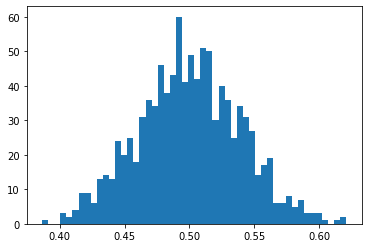

In [4]:
z = mean_of_random_variables(uniform, n=50)
plt.hist(z, bins = 50)
plt.show()

## Bernoulli Distribution

The Bernoulli distribution describes coin toss. The probs argument gives the probability of heads. Let us first start with a fair coin i.e. probs = 0.5.

In [5]:
bernoulli_1 = tfd.Bernoulli(probs=0.5)

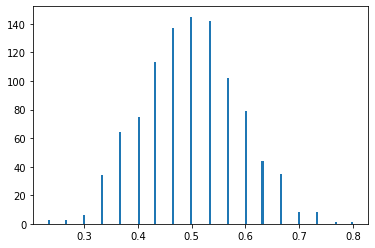

In [6]:
z = mean_of_random_variables(bernoulli_1, n=30)
plt.hist(z, bins = 150)
plt.show()

We could also use a loaded coin that heavly favors one side.

In [7]:
bernoulli_2 = tfd.Bernoulli(probs=0.1)

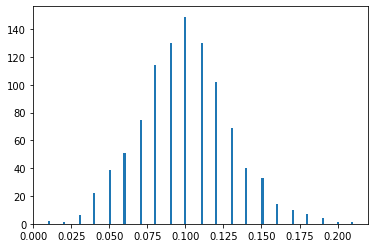

In [8]:
z = mean_of_random_variables(bernoulli_2, n=100)
plt.hist(z, bins = 150)
plt.show()

## Categorical Distribution

Categorical distribution describes a dice roll. We start by constructing a categorical distribution object with six equally likely outcomes.

In [9]:
categorical_1 = tfd.Categorical(probs=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

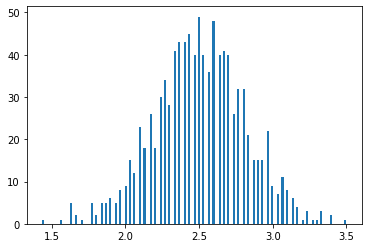

In [10]:
z = mean_of_random_variables(categorical_1, n=30)
plt.hist(z, bins = 150)
plt.show()

What if the dice is loaded so that only three of the six sides are favoured? Even here we get a Gaussian-like distribution.

In [11]:
categorical_1 = tfd.Categorical(probs=[1/3, 1/3, 1/3, 0, 0, 0])

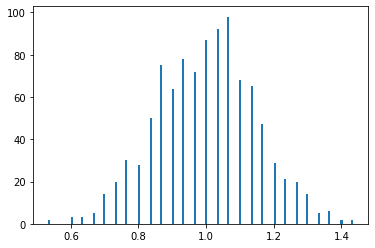

In [12]:
z = mean_of_random_variables(categorical_1, n=30)
plt.hist(z, bins = 150)
plt.show()

Even though we get Gaussian-like distibutions in both the unloaded and loaded dice cases, the mean of the distributions are clearly different.

# Random Walk and Diffusion Process


The central limit theorem can be used to explain the diffusion process. The diffusion in one dimension can be modeled as a random walk process of a single particle. By random walk, what is meant is that at any given step the particle could move either left or right by one unit with equal probability. Now if the particle starts at the origin, what is its position after $n$ steps? It more likely to be the origin itself, given that both the left and right movements are equally likely. We could do a little better in trying to get the position of the particle. Let us try to model the probability distribution for the particle's position using histogram plots.

First, let us create a Categorical distribution object with two events of equal probability.

In [13]:
random_walk = tfd.Categorical(probs = [1/2, 1/2])

The random_walk distribution object has event space $s = \{0,1\}$, while we need an event space of $x = \{-1,1\}$ to model left and right movement. One can move from one event space to another using a simple bijection $x = 2s-1$. The following function maps the event space and then adds $n$ samples to get the position after $n$ steps.

In [14]:
def random_walk_n_steps(distribution, steps):
    sample_size = 1000*steps
    x = 2*distribution.sample(sample_size)-1
    z = []
    for i in range(int(sample_size/steps)):
        temp = 0
        for j in range(steps):
            temp += x[steps*i+j]
        z.append(temp)
        
    return z 

Let us get the histogram plots for the particle's position after $20, 200, 600, 1000$, and $2000$ steps.

In [15]:
z1 = random_walk_n_steps(random_walk, steps=20)
z2 = random_walk_n_steps(random_walk, steps=200)
z3 = random_walk_n_steps(random_walk, steps=600)
z4 = random_walk_n_steps(random_walk, steps=1000)
z5 = random_walk_n_steps(random_walk, steps=2000)

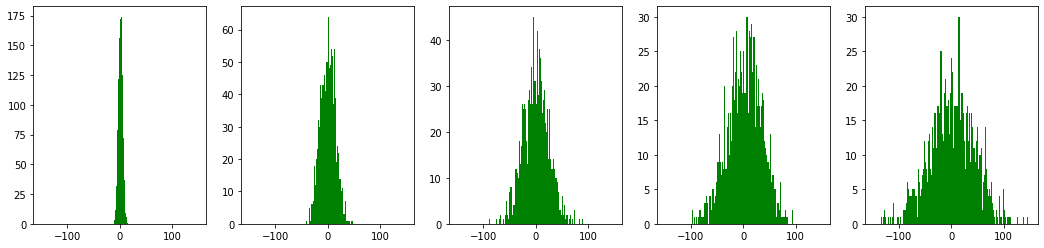

In [16]:
plt.figure(figsize=(18,4))
plt.subplot(1,5,1)
plt.hist(z1, bins = 150, range=[-150,150], facecolor = 'green')
plt.subplot(1,5,2)
plt.hist(z2, bins = 150, range=[-150,150], facecolor = 'green')
plt.subplot(1,5,3)
plt.hist(z3, bins = 150, range=[-150,150], facecolor = 'green')
plt.subplot(1,5,4)
plt.hist(z4, bins = 150, range=[-150,150], facecolor = 'green')
plt.subplot(1,5,5)
plt.hist(z5, bins = 150, range=[-150,150], facecolor = 'green')
plt.show()

The following can be observed from the histogram plots:

1) As expected the particle is most likely to be found at the origin.

2) At a given number of steps, the probability distribution for the particle's position is Gaussian-like as one might expect from the central limit theorem.

3) While the mean of the distribution remains zero, the standard deviation keeps increasing with the number of steps. This is the diffusion process.